# Entity and Sentiment Analysis with the Natural Language API

GSP038

https://www.cloudskillsboost.google/focuses/1843?parent=catalog&qlcampaign=1p-EDUCR-SG-2021-MAJULAHGCP-2-25

## Overview
The Cloud Natural Language API lets you extract entities from text, perform sentiment and syntactic analysis, and classify text into categories.

In this lab, you learn how to use the Natural Language API to analyze entities, sentiment, and syntax.

What you'll learn
- Creating a Natural Language API request and calling the API with curl
- Extracting entities and running sentiment analysis on text with the Natural Language API
- Performing linguistic analysis on text with the Natural Language API
- Creating a Natural Language API request in a different language

# Create an API Key
Since you use `curl` to send a request to the Natural Language API, you must generate an API key to pass in your request URL.

To create an API key, in the Cloud Console, select `Navigation` menu > `APIs & Services` > `Credentials`.

Click `Create credentials` and select `API key`:

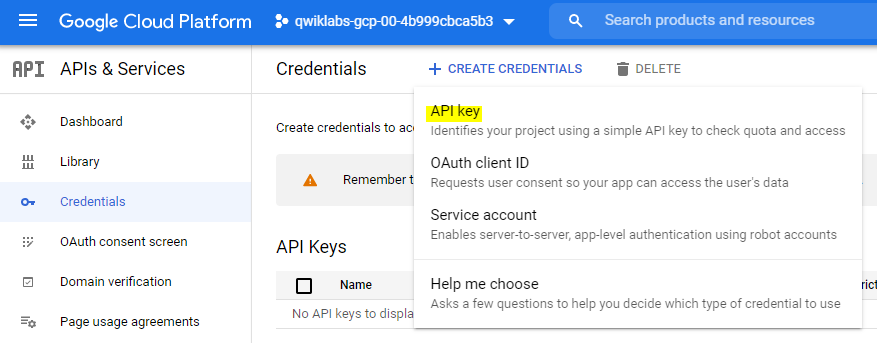

Copy the generated API key and click `Close`.

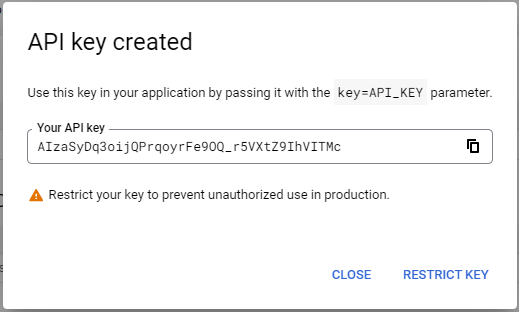

In order to perform next steps please connect to the instance provisioned for you via SSH. Open the navigation menu and select `Compute Engine`. You should see the following provisioned linux instance. Click on the `SSH` button. You will be brought to an interactive shell. 

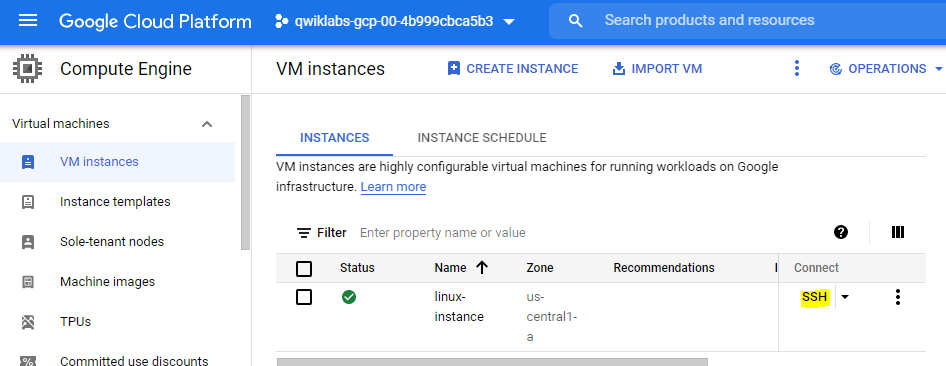

In the command line, enter in the following, replacing <YOUR_API_KEY> with the key you just copied:

In [ ]:
export API_KEY=<YOUR_API_KEY>

# Make an Entity Analysis Request

The first Natural Language API method you use is `analyzeEntities`. With this method, the API can extract entities (like people, places, and events) from text. To try it out the API's entity analysis, use the following sentence:

`Joanne Rowling, who writes under the pen names J. K. Rowling and Robert Galbraith, is a British novelist and screenwriter who wrote the Harry Potter fantasy series.`

You build your request to the Natural Language API in the file, `request.json`.

Use `nano` (code editor) to create the file `request.json`:

In [ ]:
nano request.json

Type or paste the following code into `request.json`:

In [ ]:
{
  "document":{
    "type":"PLAIN_TEXT",
    "content":"Joanne Rowling, who writes under the pen names J. K. Rowling and Robert Galbraith, is a British novelist and screenwriter who wrote the Harry Potter fantasy series."
  },
  "encodingType":"UTF8"
}

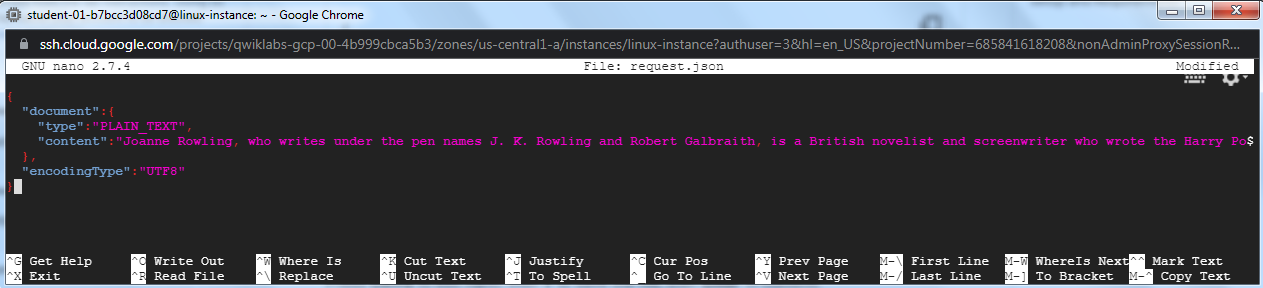

Press `Ctrl+x` to exit nano, then `Y` to save the file, then `Enter` to confirm.

In the request, you're telling the Natural Language API about the text being sent. Supported type values are `PLAIN_TEXT` or `HTML`. 

In `content`, you pass the text to send to the Natural Language API for analysis. The Natural Language API also supports sending files stored in Cloud Storage for text processing. If you wanted to send a file from Cloud Storage, you would replace `content` with `gcsContentUri` and give it a value of the text file's uri in Cloud Storage. `encodingType` tells the API which type of text encoding to use when processing our text. The API will use this to calculate where specific entities appear in our text.

# Call the Natural Language API

You can now pass your request body, along with the API key environment variable you saved earlier, to the Natural Language API with the following `curl` command (all in one single command line):

In [ ]:
curl "https://language.googleapis.com/v1/documents:analyzeEntities?key=${API_KEY}" \
  -s -X POST -H "Content-Type: application/json" --data-binary @request.json > result.json

In order to check the response run:

In [ ]:
cat result.json

The beginning of your response should look like this:

In [ ]:
            "content": "Joanne Rowling",
            "beginOffset": 0
          },
          "type": "PROPER"
        },
        {
          "text": {
            "content": "Rowling",
            "beginOffset": 53
          },
          "type": "PROPER"
        },
        {
          "text": {
            "content": "novelist",
            "beginOffset": 96
          },
          "type": "COMMON"
        },
        {
          "text": {
            "content": "Robert Galbraith",
            "beginOffset": 65
          },
          "type": "PROPER"
        }
      ]
    },
    ...
  ]
}

For each entity in the response, you get the entity `type`, the associated Wikipedia URL if there is one, the `salience`, and the indices of where this entity appeared in the text. Salience is a number in the [0,1] range that refers to the centrality of the entity to the text as a whole. The Natural Language API can also recognize the same entity mentioned in different ways. Take a look at the `mentions` list in the response: ​the API is able to tell that "Joanne Rowling", "Rowling", "novelist" and "Robert Galbriath" all point to the same thing.​

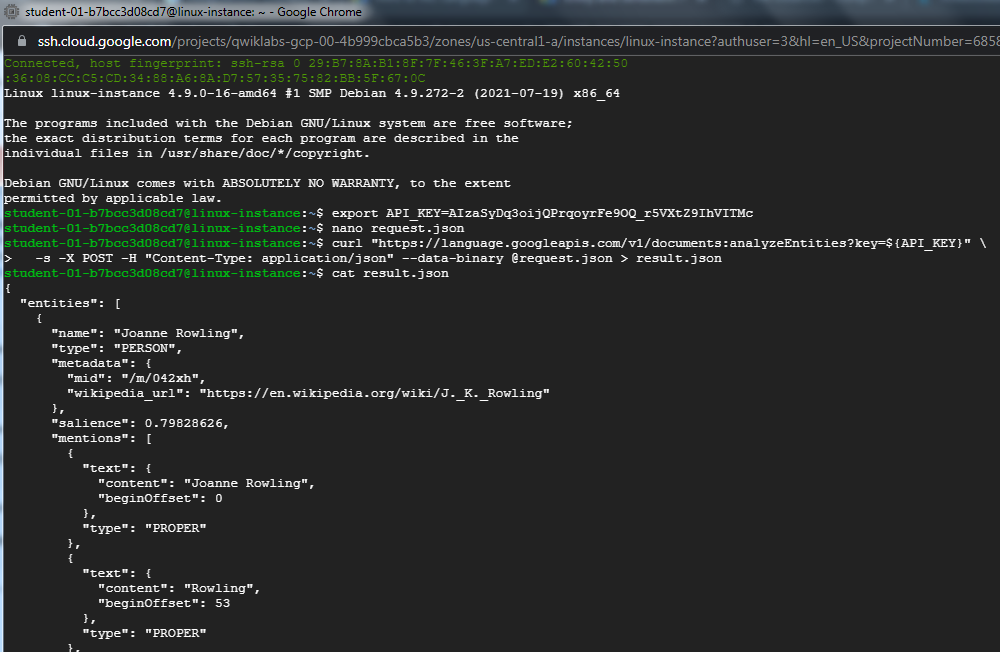

# Sentiment analysis with the Natural Language API

In addition to extracting entities, the Natural Language API also lets you perform sentiment analysis on a block of text. This JSON request will include the same parameters as the request above, but this time change the text to include something with a stronger sentiment.

Use nano to replace the code in `request.json` with the following, and feel free to replace the `content` below with your own text:

In [ ]:
 {
  "document":{
    "type":"PLAIN_TEXT",
    "content":"Harry Potter is the best book. I think everyone should read it."
  },
  "encodingType": "UTF8"
}

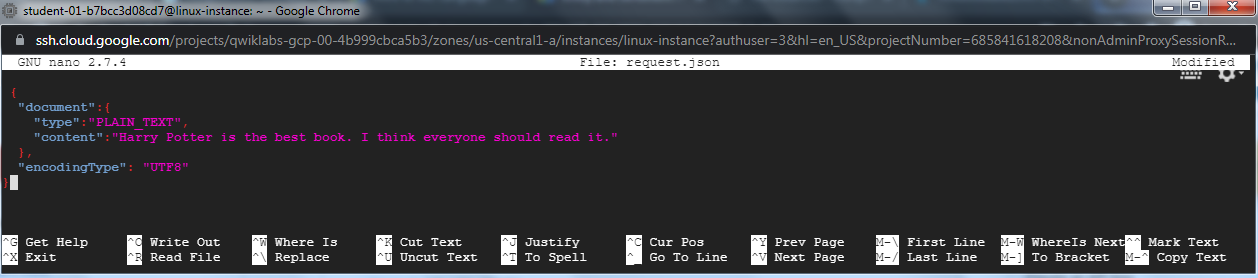

Press `Ctrl+x` to exit nano, then `Y` to save the file, then `Enter` to confirm.

Next you send the request to the API's `analyzeSentiment` endpoint:

In [ ]:
curl "https://language.googleapis.com/v1/documents:analyzeSentiment?key=${API_KEY}" \
  -s -X POST -H "Content-Type: application/json" --data-binary @request.json

Your response should look like this:

In [ ]:
{
  "documentSentiment": {
    "magnitude": 0.8,
    "score": 0.4
  },
  "language": "en",
  "sentences": [
    {
      "text": {
        "content": "Harry Potter is the best book.",
        "beginOffset": 0
      },
      "sentiment": {
        "magnitude": 0.7,
        "score": 0.7
      }
    },
    {
      "text": {
        "content": "I think everyone should read it.",
        "beginOffset": 31
      },
      "sentiment": {
        "magnitude": 0.1,
        "score": 0.1
      }
    }
  ]
}

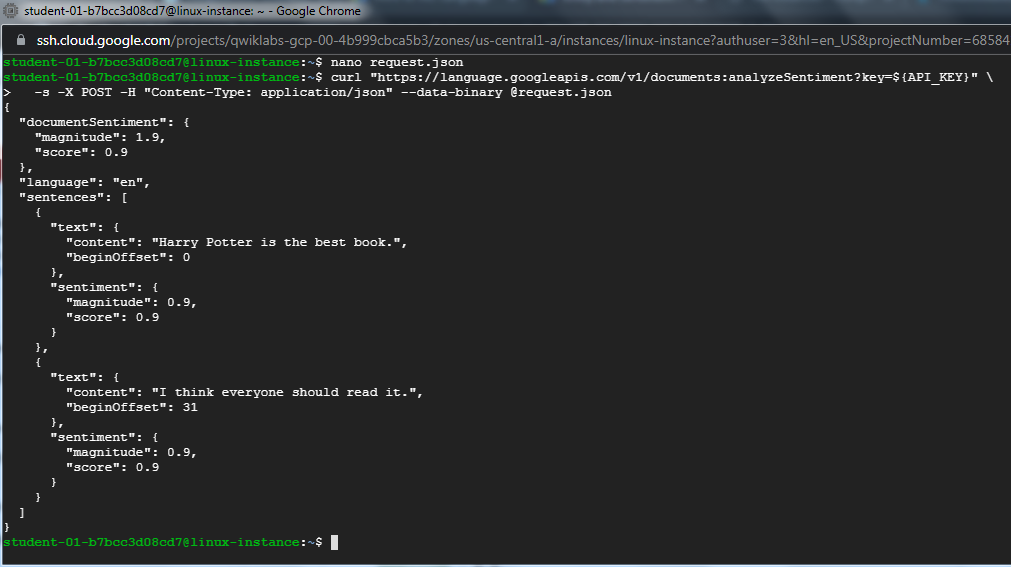

Notice that you get two types of sentiment values: sentiment for the document as a whole, and sentiment broken down by sentence. The sentiment method returns two values:

- `score` - is a number from -1.0 to 1.0 indicating how positive or negative the statement is.
- `magnitude` - is a number ranging from 0 to infinity that represents the weight of sentiment expressed in the statement, regardless of being positive or negative.

Longer blocks of text with heavily weighted statements have higher magnitude values. The score for the first sentence is positive (0.7), whereas the score for the second sentence is neutral (0.1).

# Analyzing entity sentiment

In addition to providing sentiment details on the entire text document, the Natural Language API can also break down sentiment by the entities in the text. Use this sentence as an example:

`I liked the sushi but the service was terrible.`

In this case, getting a sentiment score for the entire sentence as you did above might not be so useful. If this was a restaurant review and there were hundreds of reviews for the same restaurant, you'd want to know exactly which things people liked and didn't like in their reviews. Fortunately, the Natural Language API has a method that lets you get the sentiment for each entity in the text, called `analyzeEntitySentiment`. Let's see how it works!

Use nano to update `request.json` with the sentence below:

In [ ]:
 {
  "document":{
    "type":"PLAIN_TEXT",
    "content":"I liked the sushi but the service was terrible."
  },
  "encodingType": "UTF8"
}

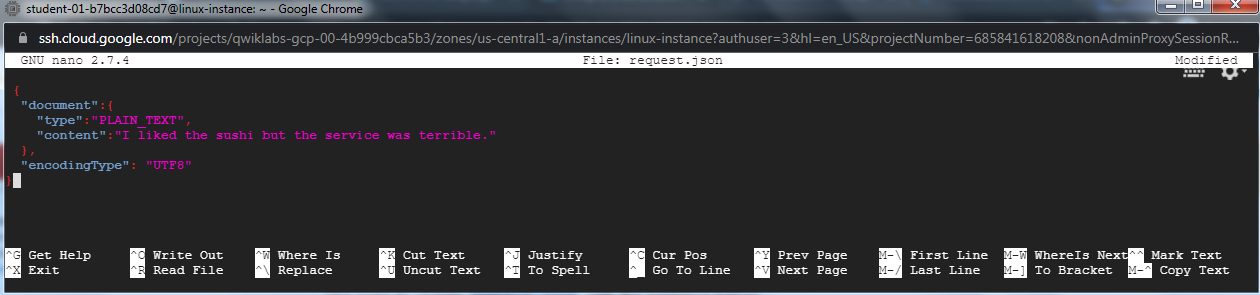

Press `Ctrl+x` to exit nano, then `Y` to save the file, then `Enter` to confirm.

Then call the `analyzeEntitySentiment` endpoint with the following `curl` command:

In [ ]:
curl "https://language.googleapis.com/v1/documents:analyzeEntitySentiment?key=${API_KEY}" \
  -s -X POST -H "Content-Type: application/json" --data-binary @request.json

In the response you get back two entity objects: one for "sushi" and one for "service". 

Here's the full JSON response:

In [ ]:
{
  "entities": [
    {
      "name": "sushi",
      "type": "CONSUMER_GOOD",
      "metadata": {},
      "salience": 0.52716845,
      "mentions": [
        {
          "text": {
            "content": "sushi",
            "beginOffset": 12
          },
          "type": "COMMON",
          "sentiment": {
            "magnitude": 0.9,
            "score": 0.9
          }
        }
      ],
      "sentiment": {
        "magnitude": 0.9,
        "score": 0.9
      }
    },
    {
      "name": "service",
      "type": "OTHER",
      "metadata": {},
      "salience": 0.47283158,
      "mentions": [
        {
          "text": {
            "content": "service",
            "beginOffset": 26
          },
          "type": "COMMON",
          "sentiment": {
            "magnitude": 0.9,
            "score": -0.9
          }
        }
      ],
      "sentiment": {
        "magnitude": 0.9,
        "score": -0.9
      }
    }
  ],
  "language": "en"
}

You can see that the score returned for "sushi" was 0.9, whereas "service" got a score of -0.9. Cool! You also may notice that there are two sentiment objects returned for each entity. If either of these terms were mentioned more than once, the API would return a different sentiment score and magnitude for each mention, along with an aggregate sentiment for the entity.

# Analyzing syntax and parts of speech

Use **syntactic analysis**, another of the Natural Language API's method, to dive deeper into the the linguistic details of the text. `analyzeSyntax` extracts linguistic information, breaking up the given text into a series of sentences and tokens (generally, word boundaries), to provide further analysis on those tokens. For each word in the text, the API tells you the word's part of speech (noun, verb, adjective, etc.) and how it relates to other words in the sentence (Is it the root verb? A modifier?).

Try it out with a simple sentence. This JSON request will be similar to the ones above, with the addition of a features key. This tells the API to perform syntax annotation.

Use nano to replace the code in `request.json` with the following:

In [ ]:
{
  "document":{
    "type":"PLAIN_TEXT",
    "content": "Joanne Rowling is a British novelist, screenwriter and film producer."
  },
  "encodingType": "UTF8"
}

Press `Ctrl+x` to exit nano, then `Y` to save the file, then `Enter` to confirm.

Then call the API's `analyzeSyntax` method:

In [ ]:
curl "https://language.googleapis.com/v1/documents:analyzeSyntax?key=${API_KEY}" \
  -s -X POST -H "Content-Type: application/json" --data-binary @request.json

The response should return an object like the one below for each token in the sentence:

In [ ]:
{
      "text": {
        "content": "is",
        "beginOffset": 15
      },
      "partOfSpeech": {
        "tag": "VERB",
        "aspect": "ASPECT_UNKNOWN",
        "case": "CASE_UNKNOWN",
        "form": "FORM_UNKNOWN",
        "gender": "GENDER_UNKNOWN",
        "mood": "INDICATIVE",
        "number": "SINGULAR",
        "person": "THIRD",
        "proper": "PROPER_UNKNOWN",
        "reciprocity": "RECIPROCITY_UNKNOWN",
        "tense": "PRESENT",
        "voice": "VOICE_UNKNOWN"
      },
      "dependencyEdge": {
        "headTokenIndex": 2,
        "label": "ROOT"
      },
      "lemma": "be"
    },

Let's break down the response:

- `partOfSpeech` tells you that "Joanne" is a noun.
- `dependencyEdge` includes data that you can use to create a [dependency parse tree](https://en.wikipedia.org/wiki/Parse_tree#Dependency-based_parse_trees) of the text. Essentially, this is a diagram showing how words in a sentence relate to each other. A dependency parse tree for the sentence above would look like this:

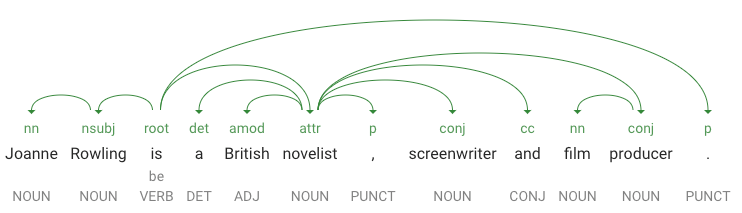

Note: You can create your own dependency parse trees in the browser with the Natural Language demo available here: https://cloud.google.com/natural-language

- `headTokenIndex` is the index of the token that has an arc pointing at "Joanne". Think of each token in the sentence as a word in an array.

- `headTokenIndex` of 1 for "Joanne" refers to the word "Rowling", which it is connected to in the tree. The label `NN` (short for noun compound modifier) describes the word's role in the sentence. "Joanne" modifies "Rowling", the subject of the sentence.

- `lemma` is the canonical form of the word. For example, the words run, runs, ran, and running all have a lemma of run. The lemma value is useful for tracking occurrences of a word in a large piece of text over time.

# Multilingual natural language processing

The Natural Language API also supports languages other than English (full list [here](https://cloud.google.com/natural-language/docs/languages)). Modify the code in `request.json` with a sentence in Japanese:

In [ ]:
{
  "document":{
    "type":"PLAIN_TEXT",
    "content":"日本のグーグルのオフィスは、東京の六本木ヒルズにあります"
  }
}

Press `Ctrl+x` to exit nano, then `Y` to save the file, then `Enter` to confirm.

Notice that you didn't tell the API which language the text is, it can automatically detect it!

Next, you send it to the `analyzeEntities` endpoint:

In [ ]:
curl "https://language.googleapis.com/v1/documents:analyzeEntities?key=${API_KEY}" \
  -s -X POST -H "Content-Type: application/json" --data-binary @request.json

And you get the following response:

In [ ]:
{
  "entities": [
    {
      "name": "日本",
      "type": "LOCATION",
      "metadata": {
        "mid": "/m/03_3d",
        "wikipedia_url": "https://en.wikipedia.org/wiki/Japan"
      },
      "salience": 0.23854347,
      "mentions": [
        {
          "text": {
            "content": "日本",
            "beginOffset": 0
          },
          "type": "PROPER"
        }
      ]
    },
    {
      "name": "グーグル",
      "type": "ORGANIZATION",
      "metadata": {
        "mid": "/m/045c7b",
        "wikipedia_url": "https://en.wikipedia.org/wiki/Google"
      },
      "salience": 0.21155767,
      "mentions": [
        {
          "text": {
            "content": "グーグル",
            "beginOffset": 9
          },
          "type": "PROPER"
        }
      ]
    },
    ...
  ]
  "language": "ja"
}

The wikipedia URLs even point to the Japanese Wikipedia pages - so cool!